# Evaluating the risk-return performance of AAPL and MSFT in 2024

<h2 style="color:yellow;">---- 1. Data Acquisition ----</h2>

<h2 style="color:lightblue;">Identifying Data Source and Confirming Credibility:</h2>

* **Source**: Yahoo Finance (via automated web scrape using the `yfinance` Python library (unofficial Yahoo Finance interface)
* **Credibility**: Yahoo Finance aggregates public market data; widely used in financial analysis
* **Retrieval method**: `yfinacne` library using the `Ticker` and `history` methods
* **Scope**: Apple Inc. (`AAPL`) and Microsoft Corp. (`MSFT`), one-year period (2024)
* **Verification**: Confirmed 
* **Storage**: Raw DataFrame exported unchanged as `raw_data/aapl_raw.csv` and `raw_data/msft_raw.csv` before cleaning

<h2 style="color:lightblue;">Importing Libraries</h2>

All Python libraries used. Individual functions imported to avoid clutter and minimise load time.

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import math
import statistics

pd.set_option("display.float_format", "{:,.2f}".format)


<h2 style="color:lightblue;">Importing Tickers Using yfinance</h2>

In [2]:
# AAPL
aapl = yf.Ticker("AAPL")
aapl_df = yf.download(tickers="AAPL", start="2024-01-01", end="2024-12-31", auto_adjust=True)

# MSFT
msft = yf.Ticker("MSFT")
msft_df = yf.download(tickers="MSFT", start="2024-01-01", end="2024-12-31", auto_adjust=True)

# Quick inspection
display(msft_df.head(), aapl_df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2024-01-02,366.11,371.07,362.06,369.06,25258600
2024-01-03,365.84,368.46,363.78,364.27,23083500
2024-01-04,363.21,368.31,362.45,365.91,20901500
2024-01-05,363.03,367.28,361.79,364.23,21004600
2024-01-08,369.88,370.38,364.27,364.56,23134000


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.08,186.86,182.35,185.58,82488700
2024-01-03,182.70,184.32,181.89,182.67,58414500
2024-01-04,180.38,181.55,179.36,180.62,71983600
2024-01-05,179.66,181.23,178.66,180.46,62379700
2024-01-08,184.00,184.04,179.98,180.56,59144500


<h2 style="color:yellow;">---- 2. Data Inspection ----</h2>

<h2 style="color:lightblue">Shape Summaries</h2>

In [3]:
display(Markdown("#### AAPL"))
print(f" - Length = {aapl_df.shape[0]} rows")
print(f" - Width = {aapl_df.shape[1]} columns")

display(Markdown("#### MSFT"))
print(f" - Length = {msft_df.shape[0]} rows")
print(f" - Width = {msft_df.shape[1]} columns")

#### AAPL

 - Length = 251 rows
 - Width = 5 columns


#### MSFT

 - Length = 251 rows
 - Width = 5 columns


<h2 style="color:lightblue;">Column Summaries</h2>

##### `AAPL`

In [4]:
# AAPL
display(Markdown("#### AAPL"))
aapl_df_columns = list(aapl_df.columns.values)
print(f" - Column names: {aapl_df_columns}")
print(" - Column types:")
for col, types in aapl_df.dtypes.items():
    print(f"    {col} = {types}")

# MSFT
display(Markdown("#### MSFT"))
msft_df_columns = list(msft_df.columns.values)
print(f" - Column names: {msft_df_columns}")
print(" - Column types:")
for col, types in msft_df.dtypes.items():
    print(f"    {col} = {types}")

#### AAPL

 - Column names: [('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]
 - Column types:
    ('Close', 'AAPL') = float64
    ('High', 'AAPL') = float64
    ('Low', 'AAPL') = float64
    ('Open', 'AAPL') = float64
    ('Volume', 'AAPL') = int64


#### MSFT

 - Column names: [('Close', 'MSFT'), ('High', 'MSFT'), ('Low', 'MSFT'), ('Open', 'MSFT'), ('Volume', 'MSFT')]
 - Column types:
    ('Close', 'MSFT') = float64
    ('High', 'MSFT') = float64
    ('Low', 'MSFT') = float64
    ('Open', 'MSFT') = float64
    ('Volume', 'MSFT') = int64


<h2 style="color:lightblue;">Missing Values</h2>

(All columns return 0 missing values for each dataframe `aapl_df` and `msft_df`)

In [5]:
display(Markdown("#### AAPL:"))
print(aapl_df.isnull().sum())

display(Markdown("#### MSFT:"))
print(msft_df.isnull().sum())

#### AAPL:

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


#### MSFT:

Price   Ticker
Close   MSFT      0
High    MSFT      0
Low     MSFT      0
Open    MSFT      0
Volume  MSFT      0
dtype: int64


<h2 style="color:lightblue;">Statistical Analysis</h2>

##### `AAPL`

In [6]:
display(Markdown("###  MSFT STDev"))
display(round(aapl_df.std(axis="rows"),2))
display(Markdown("### Min:"))
display(round(aapl_df.min(axis="rows"),2))
display(Markdown("### Max:"))
display(round(aapl_df.max(axis="rows"),2))
display(Markdown("### Mean:"))
display(round(aapl_df.mean(axis="rows"),2))



###  MSFT STDev

Price   Ticker
Close   AAPL             25.53
High    AAPL             25.60
Low     AAPL             25.15
Open    AAPL             25.34
Volume  AAPL     30,764,411.81
dtype: float64

### Min:

Price   Ticker
Close   AAPL            163.82
High    AAPL            165.21
Low     AAPL            162.91
Open    AAPL            164.17
Volume  AAPL     23,234,700.00
dtype: float64

### Max:

Price   Ticker
Close   AAPL             258.10
High    AAPL             259.18
Low     AAPL             256.72
Open    AAPL             257.28
Volume  AAPL     318,679,900.00
dtype: float64

### Mean:

Price   Ticker
Close   AAPL            205.87
High    AAPL            207.56
Low     AAPL            203.88
Open    AAPL            205.60
Volume  AAPL     57,177,003.19
dtype: float64

##### `MSFT`

In [7]:
display(Markdown("###  MSFT STDev"))
display(round(msft_df.std(axis="rows"),2))
display(Markdown("### Min:"))
display(round(msft_df.min(axis="rows"),2))
display(Markdown("### Max:"))
display(round(msft_df.max(axis="rows"),2))
display(Markdown("### Mean:"))
display(round(msft_df.mean(axis="rows"),2))



###  MSFT STDev

Price   Ticker
Close   MSFT            18.10
High    MSFT            18.02
Low     MSFT            17.99
Open    MSFT            18.02
Volume  MSFT     7,389,197.82
dtype: float64

### Min:

Price   Ticker
Close   MSFT           363.03
High    MSFT           367.28
Low     MSFT           361.79
Open    MSFT           364.23
Volume  MSFT     7,164,500.00
dtype: float64

### Max:

Price   Ticker
Close   MSFT            463.24
High    MSFT            464.02
Low     MSFT            460.17
Open    MSFT            462.69
Volume  MSFT     64,263,700.00
dtype: float64

### Mean:

Price   Ticker
Close   MSFT            416.45
High    MSFT            419.73
Low     MSFT            412.85
Open    MSFT            416.50
Volume  MSFT     20,615,866.53
dtype: float64

<h2 style="color:lightblue;">First/Last 5 Entries</h2>

##### `AAPL`

In [8]:
display(Markdown("### First 5 entries:"))
display(aapl_df.head())
display(Markdown("### Last 5 entries:"))
display(aapl_df.tail())

### First 5 entries:

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.08,186.86,182.35,185.58,82488700
2024-01-03,182.70,184.32,181.89,182.67,58414500
2024-01-04,180.38,181.55,179.36,180.62,71983600
2024-01-05,179.66,181.23,178.66,180.46,62379700
2024-01-08,184.00,184.04,179.98,180.56,59144500


### Last 5 entries:

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,254.37,254.75,252.55,253.87,40858800
2024-12-24,257.29,257.30,254.39,254.59,23234700
2024-12-26,258.10,259.18,256.72,257.28,27237100
2024-12-27,254.69,257.78,252.16,256.92,42355300
2024-12-30,251.31,252.60,249.86,251.34,35557500


##### `MSFT`

In [9]:
display(Markdown("### First 5 entries:"))
display(msft_df.head())
display(Markdown("### Last 5 entries:"))
display(msft_df.tail())

### First 5 entries:

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2024-01-02,366.11,371.07,362.06,369.06,25258600
2024-01-03,365.84,368.46,363.78,364.27,23083500
2024-01-04,363.21,368.31,362.45,365.91,20901500
2024-01-05,363.03,367.28,361.79,364.23,21004600
2024-01-08,369.88,370.38,364.27,364.56,23134000


### Last 5 entries:

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2024-12-23,432.87,435.26,430.46,434.35,19152500
2024-12-24,436.93,437.20,431.82,432.27,7164500
2024-12-26,435.72,438.53,434.24,436.68,8194200
2024-12-27,428.18,432.84,424.02,432.22,18117700
2024-12-30,422.51,425.21,419.59,423.73,13158700


<h2 style="color:lightblue;">Duplicate Entries</h2>

In [10]:
display(Markdown(f"AAPL duplicates: `{int(aapl_df.duplicated().sum())}`"))
display(Markdown(f"MSFT duplicates: `{int(msft_df.duplicated().sum())}`"))

AAPL duplicates: `0`

MSFT duplicates: `0`

<h2 style="color:lightblue;">Chronological Order Check</h2>

In [11]:
# Checking index type
display(Markdown(f"AAPL index type: `{type(aapl_df.index).__name__}`"))
display(Markdown(f"MSFT index type: `{type(msft_df.index).__name__}`"))

AAPL index type: `DatetimeIndex`

MSFT index type: `DatetimeIndex`

In [12]:
# Checking chronological order
chronological_order = aapl_df.index.is_monotonic_increasing
display(Markdown(f"AAPL dates are chronological: `{chronological_order}`"))

chronological_order = msft_df.index.is_monotonic_increasing
display(Markdown(f"MSFT dates are chronological: `{chronological_order}`"))

AAPL dates are chronological: `True`

MSFT dates are chronological: `True`

<h2 style="color:yellow;">---- 3. Data Cleaning ----</h2>

<h2 style="color:lightblue;">Formatting Missing Values</h2>

N/A for both `AAPL` and `MSFT` dataframes - no missing values as confirmed above

<h2 style="color:lightblue;">Range and Logic Validation</h2>

##### `AAPL`

In [13]:
# AAPL
display(Markdown("#### AAPL:"))
aapl_df_valid = (aapl_df["Low"] <= aapl_df["Open"]) & (aapl_df["Open"] <= aapl_df["High"])
print(aapl_df_valid.all())

# MSFT
display(Markdown("#### AAPL:"))
msft_df_valid = (msft_df["Low"] <= msft_df["Open"]) & (msft_df["Open"] <= msft_df["High"])
print(msft_df_valid.all())

#### AAPL:

Ticker
AAPL    True
dtype: bool


#### AAPL:

Ticker
MSFT    True
dtype: bool


<h2 style="color:lightblue;">Format Standardistation</h2>

Comparing `aapl_df` and `msft_df` with yfinance ticker histories

In [14]:
display(Markdown("#### AAPL:"))
display(yf.Ticker("AAPL").history(start="2024-01-01", end="2024-01-09"), aapl_df.head())

#### AAPL:

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00-05:00,185.58,186.86,182.35,184.08,82488700,0.00,0.00
2024-01-03 00:00:00-05:00,182.67,184.32,181.89,182.70,58414500,0.00,0.00
2024-01-04 00:00:00-05:00,180.62,181.55,179.36,180.38,71983600,0.00,0.00
2024-01-05 00:00:00-05:00,180.46,181.23,178.66,179.66,62379700,0.00,0.00
2024-01-08 00:00:00-05:00,180.56,184.04,179.98,184.00,59144500,0.00,0.00


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.08,186.86,182.35,185.58,82488700
2024-01-03,182.70,184.32,181.89,182.67,58414500
2024-01-04,180.38,181.55,179.36,180.62,71983600
2024-01-05,179.66,181.23,178.66,180.46,62379700
2024-01-08,184.00,184.04,179.98,180.56,59144500


In [15]:
display(Markdown("#### MSFT"))
display(yf.Ticker("MSFT").history(start="2024-01-01", end="2024-01-09"), msft_df.head())

#### MSFT

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00-05:00,369.06,371.07,362.06,366.11,25258600,0.00,0.00
2024-01-03 00:00:00-05:00,364.27,368.46,363.78,365.84,23083500,0.00,0.00
2024-01-04 00:00:00-05:00,365.91,368.31,362.45,363.21,20901500,0.00,0.00
2024-01-05 00:00:00-05:00,364.23,367.28,361.79,363.03,21004600,0.00,0.00
2024-01-08 00:00:00-05:00,364.56,370.38,364.27,369.88,23134000,0.00,0.00


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2024-01-02,366.11,371.07,362.06,369.06,25258600
2024-01-03,365.84,368.46,363.78,364.27,23083500
2024-01-04,363.21,368.31,362.45,365.91,20901500
2024-01-05,363.03,367.28,361.79,364.23,21004600
2024-01-08,369.88,370.38,364.27,364.56,23134000


<h2 style="color:lightblue;">Outlier Inspection</h2>

Visual inspection of outliers for each column: Low, High, Open, Close and Volume.

<Axes: title={'center': 'AAPL Daily Price Summary'}, xlabel='Date'>

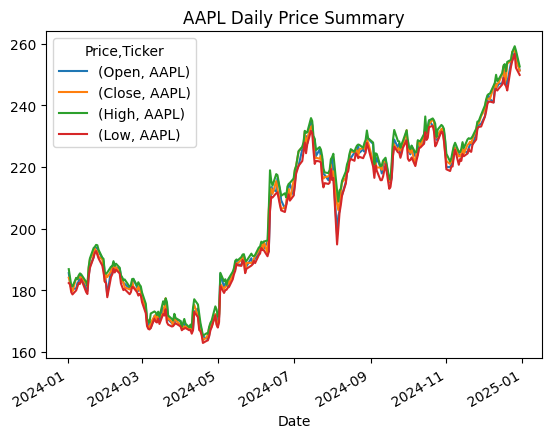

In [16]:
aapl_df.plot(
    y=["Open","Close","High", "Low"],
    title="AAPL Daily Price Summary")


<Axes: title={'center': 'MSFT Daily Price Summary'}, xlabel='Date'>

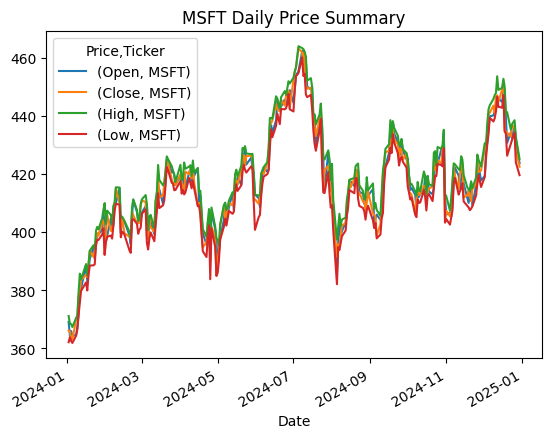

In [17]:
msft_df.plot(
    y=["Open","Close","High", "Low"],
    title="MSFT Daily Price Summary")

<h2 style="color:lightblue;">Combined Volume Check</h2>

* Combining volume checks allows for easeier visual inspection of outliers as common spikes indicate general market behvaiour. 
* Independent spikes are checked against Yahoo Finance and MarketWatch

Ticker,AAPL,MSFT
Date,,
2024-01-02,82488700,25258600
2024-01-03,58414500,23083500
2024-01-04,71983600,20901500
2024-01-05,62379700,21004600
2024-01-08,59144500,23134000


<Axes: title={'center': 'Volume'}, xlabel='Date'>

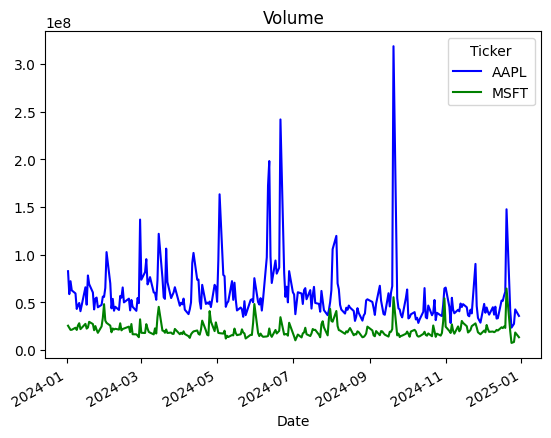

In [18]:
combined_vol = pd.concat([aapl_df["Volume"], msft_df["Volume"]], axis=1)
display(
    combined_vol.head(),
    combined_vol.plot(
        y=["AAPL", "MSFT"],
        title="Volume",
        color=["Blue","Green"]))

<h2 style="color:yellow;">---- 4. Data Transformation - Derived Metrics ----</h2>

<h2 style="color:lightblue;">PCT Returns</h2>

In [19]:
pct_returns_daily_df = pd.DataFrame({
    "AAPL": aapl_df["Close"]["AAPL"].pct_change(),
    "MSFT": msft_df["Close"]["MSFT"].pct_change()
})

pct_returns_weekly_df = pct_returns_daily_df.resample("W").mean()


In [20]:
display(Markdown("### Daily PCT Returns"))
display(pct_returns_daily_df.head())

display(Markdown("### Weekly PCT Returns"))
display(pct_returns_weekly_df.head())

### Daily PCT Returns

,AAPL,MSFT
Date,,
2024-01-02,NaN,NaN
2024-01-03,-0.01,-0.00
2024-01-04,-0.01,-0.01
2024-01-05,-0.00,-0.00
2024-01-08,0.02,0.02


### Weekly PCT Returns

,AAPL,MSFT
Date,,
2024-01-07,-0.01,-0.00
2024-01-14,0.01,0.01
2024-01-21,0.01,0.01
2024-01-28,0.00,0.00
2024-02-04,-0.01,0.00


<h2 style="color:lightblue;">Plotting PCT Returns</h2>

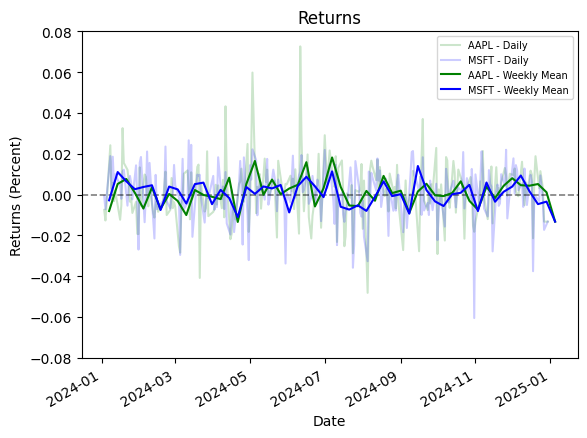

In [21]:
ax = pct_returns_daily_df.plot(
    y=["AAPL","MSFT"],
    title="Returns",
    color=["Green","Blue"],
    alpha=0.2,
    ylim=[-.08,.08],
    ylabel="Returns (Percent)"
)

ax.axhline(y=0, color = "black", linestyle="--", alpha=0.5, linewidth=1.2, label="_nolegend_")

pct_returns_weekly_df.plot(
    color=["Green","Blue"],
    ax=ax
)

ax.legend(["AAPL - Daily", "MSFT - Daily", "AAPL - Weekly Mean", "MSFT - Weekly Mean"], fontsize=7)

<h2 style="color:lightblue;">Return-Volatility Ratio</h2>

In [22]:
aapl_volatility, msft_volatility = pct_returns_daily_df["AAPL"].std(), pct_returns_daily_df["MSFT"].std()

ret_vol_ratio_daily = pd.DataFrame({
    "AAPL": pct_returns_daily_df["AAPL"] / aapl_volatility,
    "MSFT": pct_returns_daily_df["MSFT"] / msft_volatility
})

ret_vol_ratio_weekly = ret_vol_ratio_daily.resample("W").mean()

In [23]:
display(ret_vol_ratio_daily.head(), ret_vol_ratio_weekly.head())

,AAPL,MSFT
Date,,
2024-01-02,NaN,NaN
2024-01-03,-0.53,-0.06
2024-01-04,-0.90,-0.57
2024-01-05,-0.28,-0.04
2024-01-08,1.71,1.50


,AAPL,MSFT
Date,,
2024-01-07,-0.57,-0.22
2024-01-14,0.37,0.88
2024-01-21,0.54,0.52
2024-01-28,0.07,0.21
2024-02-04,-0.48,0.30


<h2 style="color:lightblue;">Plotting Return-Volatility Ratio</h2>

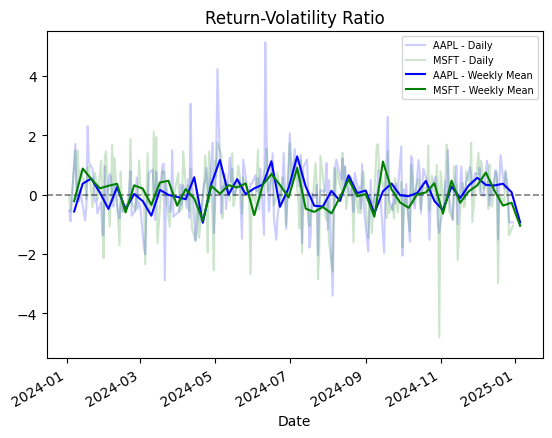

In [24]:
ax2 = ret_vol_ratio_daily.plot(
    title="Return-Volatility Ratio",
    color=["Blue","Green"],
    alpha=0.2,
    ylim=[-5.5,5.5]
)

ax2.axhline(y=0, color="black", linestyle="--", alpha=.5, linewidth=1.2, label="_nolegend_")

ret_vol_ratio_weekly.plot(
    title = "Return-Volatility Ratio",
    color = ["blue", "green"],
    ax=ax2
)
ax2.legend(["AAPL - Daily", "MSFT - Daily", "AAPL - Weekly Mean", "MSFT - Weekly Mean"], fontsize=7)

<h2 style="color:lightblue;">High-Low Ratio</h2>

In [25]:

high_low_ratio_daily = pd.DataFrame({
    "AAPL": aapl_df["High","AAPL"]/aapl_df["Low","AAPL"],
    "MSFT": msft_df["High","MSFT"]/msft_df["Low","MSFT"]
})

high_low_ratio_weekly = high_low_ratio_daily.resample("W").mean()

In [26]:
display(high_low_ratio_daily.head(), high_low_ratio_weekly.head())

,AAPL,MSFT
Date,,
2024-01-02,1.02,1.02
2024-01-03,1.01,1.01
2024-01-04,1.01,1.02
2024-01-05,1.01,1.02
2024-01-08,1.02,1.02


,AAPL,MSFT
Date,,
2024-01-07,1.02,1.02
2024-01-14,1.02,1.02
2024-01-21,1.02,1.01
2024-01-28,1.01,1.01
2024-02-04,1.02,1.02


<h2 style="color:lightblue;">Plotting High-Low Ratio</h2>

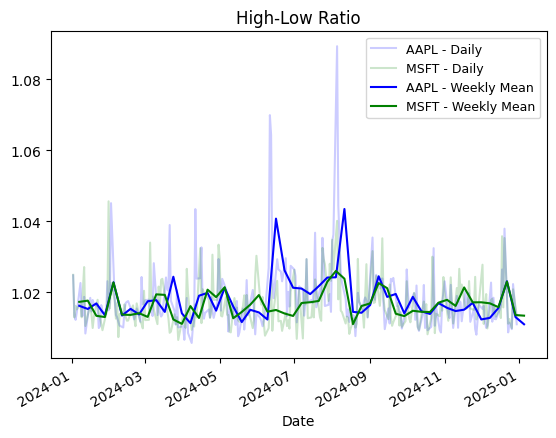

In [27]:
ax3 = high_low_ratio_daily.plot(
    title="High-Low Ratio",
    color=["Blue","Green"],
    alpha=0.2
)

high_low_ratio_weekly.plot(
    color=["Blue","Green"],
    ax=ax3    
)

ax3.legend(["AAPL - Daily", "MSFT - Daily", "AAPL - Weekly Mean", "MSFT - Weekly Mean"], fontsize=9)

<h2 style="color:lightblue;">Cumulative Percentage Change</h2>

In [28]:
cumulative_percentage_change_daily = pd.DataFrame({
    "AAPL": (aapl_df["Close","AAPL"] / aapl_df["Open","AAPL"].iloc[0]-1) * 100,
    "MSFT": (msft_df["Close","MSFT"] / msft_df["Open","MSFT"].iloc[0]-1) * 100
})

cumulative_percentage_change_weekly = cumulative_percentage_change_daily.resample("W").mean()

In [29]:
display(Markdown("### Daily:"))
display(cumulative_percentage_change_daily.head())
display(Markdown("### Weekly:"))
display(cumulative_percentage_change_weekly.head())

### Daily:

,AAPL,MSFT
Date,,
2024-01-02,-0.81,-0.80
2024-01-03,-1.55,-0.87
2024-01-04,-2.80,-1.58
2024-01-05,-3.19,-1.63
2024-01-08,-0.85,0.22


### Weekly:

,AAPL,MSFT
Date,,
2024-01-07,-2.09,-1.22
2024-01-14,-0.79,1.98
2024-01-21,-0.28,5.14
2024-01-28,3.68,7.35
2024-02-04,0.12,8.64


<h2 style="color:lightblue;">Plotting Cumulative Percentage Change</h2>

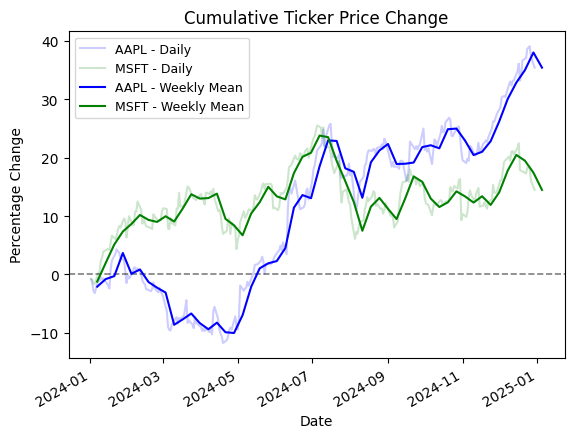

In [30]:
ax4 = cumulative_percentage_change_daily.plot(
    title="Cumulative Ticker Price Change",
    color=["Blue","Green"],
    alpha=0.2
)

ax4.axhline(y=0, color="black", linestyle="--", alpha=0.5, linewidth=1.2, label="_nolegend_")

cumulative_percentage_change_weekly.plot(
    color=["Blue","Green"],
    ax=ax4,
    ylabel="Percentage Change"
)

ax4.legend(["AAPL - Daily", "MSFT - Daily", "AAPL - Weekly Mean", "MSFT - Weekly Mean"], fontsize=9)

<h2 style="color:lightblue;">Daily Percentage Change</h2>

In [31]:
daily_percentage_change = pd.DataFrame({
    "AAPL":
        ((aapl_df["Close", "AAPL"] - aapl_df["Open", "AAPL"]) / aapl_df["Open","AAPL"]) * 100,
    "MSFT":
        ((msft_df["Close", "MSFT"] - msft_df["Open", "MSFT"]) / msft_df["Open","MSFT"]) * 100
})

weekly_percentage_change = daily_percentage_change.resample("W").mean()

<h2 style="color:lightblue;">Plotting Daily Percentage Change</h2>

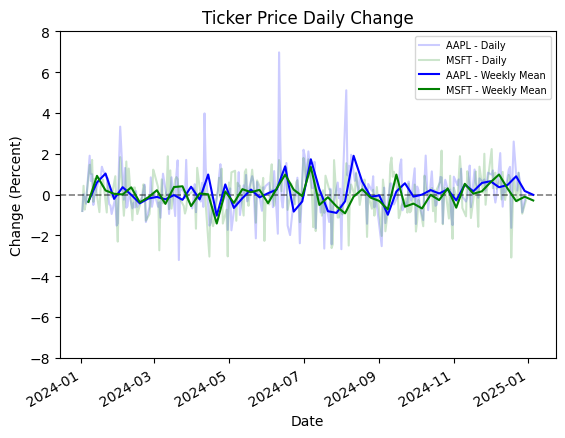

In [32]:
ax5 = daily_percentage_change.plot(
    title="Ticker Price Daily Change",
    color=["Blue","Green"],
    alpha=0.2,
    ylim=[-8,8],
    ylabel="Change (Percent)"
)

ax5.axhline(y=0, color="black", alpha=0.5, linestyle="--", linewidth=1.2, label="_nolegend_")

weekly_percentage_change.plot(
    color=["Blue","Green"],
    ax=ax5
)

ax5.legend(["AAPL - Daily", "MSFT - Daily", "AAPL - Weekly Mean", "MSFT - Weekly Mean"],fontsize=7)

<h2 style="color:lightblue;">Daily Returns Histogram</h2>

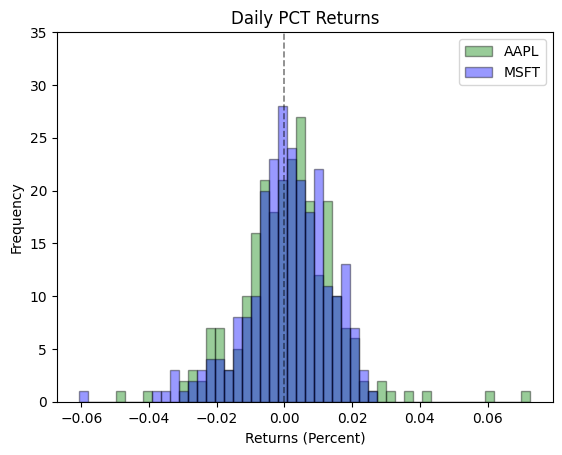

In [33]:
ax7 = pct_returns_daily_df.plot(
    y=["AAPL","MSFT"],
    kind="hist",
    ylim=(0,35),
    alpha=0.4,
    bins=50,
    color=["green","blue"],
    edgecolor = "black",
    title="Daily PCT Returns",
    ylabel="Frequency",
    xlabel="Returns (Percent)",
) # type: ignore

ax7.axvline(x=0, color="black", alpha=0.5, linestyle="--", linewidth=1.2)

<h2 style="color:lightblue;">Daily Returns Box Plot</h2>

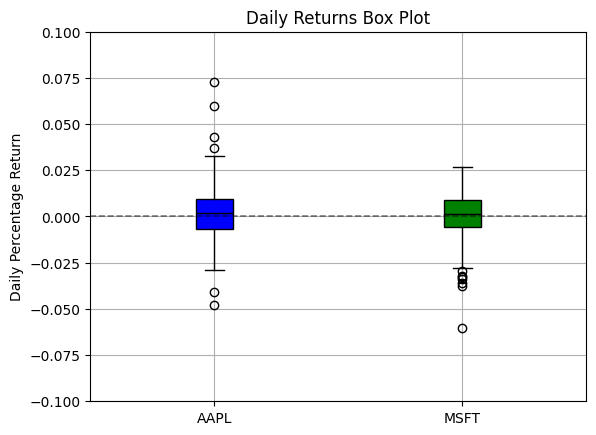

In [34]:
ax6 = pct_returns_daily_df.plot(
    y=["AAPL", "MSFT"],
    kind="box",
    title="Daily Returns Box Plot",
    color="black",
    ylabel="Daily Percentage Return",
    ylim=[-.1,.1],
    patch_artist=True,
    grid=True
)

ax6.axhline(y=0, color="black", linestyle="--", alpha=0.5, linewidth=1.2)

colors = ["blue", "green"]
for patch, color in zip(ax6.patches, colors):
    patch.set_facecolor(color)

<h2 style="color:lightblue;">Rolling Volatility</h2>

In [35]:
pct_returns_daily_df["AAPL_RollingVol"] = pct_returns_daily_df["AAPL"].rolling(21).std()
pct_returns_daily_df["MSFT_RollingVol"] = pct_returns_daily_df["MSFT"].rolling(21).std()

In [36]:
pct_returns_daily_df.dropna().head()

,AAPL,MSFT,AAPL_RollingVol,MSFT_RollingVol
Date,,,,
2024-02-01,0.01,0.02,0.01,0.01
2024-02-02,-0.01,0.02,0.01,0.01
2024-02-05,0.01,-0.01,0.01,0.01
2024-02-06,0.01,-0.00,0.01,0.01
2024-02-07,0.00,0.02,0.01,0.01


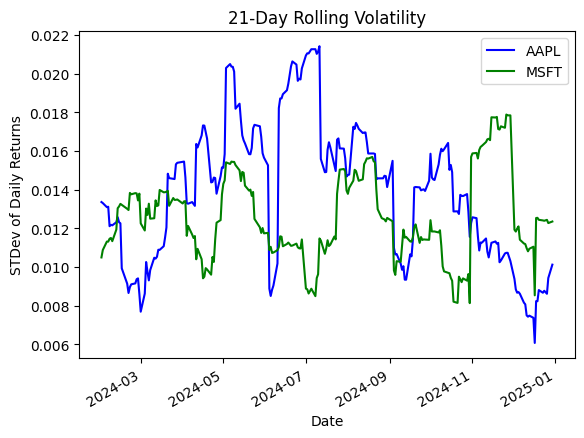

In [37]:
ax8 = pct_returns_daily_df.plot(
    y=["AAPL_RollingVol","MSFT_RollingVol"],
    color=["blue","green"],
    title="21-Day Rolling Volatility",
    ylabel="STDev of Daily Returns"
)
ax8.legend(["AAPL", "MSFT"])